# Evaluación - parte 1

In [288]:
import os
import geopandas as gpd
from  fiona import listlayers
import matplotlib.pyplot as plt
import pandas as pd 

## Exercise 1

    
### 1. Use two maps of points.

In [289]:
peru_health = "https://github.com/IntroSpatialDataScience/MiningGDF_Project1/raw/main/data/peru_health_sities.csv"
ports = "https://github.com/IntroSpatialDataScience/MiningGDF_Project1/raw/main/data/UpdatedPub150.csv"
peruMaps = "https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_24891.gpkg"

In [290]:
listlayers(peruMaps)

['country', 'cities', 'rivers']

In [291]:
peru = gpd.read_file(peruMaps,layer="country")
rivers = gpd.read_file(peruMaps,layer="rivers")
healthsites =pd.read_csv(peru_health)
portsFile =pd.read_csv(ports)

In [292]:
portsFile

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
0,7950.0,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,U.S. Coast Pilot 2 - Atlantic Coast: Cape Cod ...,https://nauticalcharts.noaa.gov/publications/c...,12331,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,40.533333,-74.250000
1,52235.0,Sulawesi -- 51970,Mangkasa Oil Terminal,,,Indonesia,Teluk Bone; Banda Sea; South Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,,...,No,No,Unknown,No,No,NaN,Unknown,Unknown,-2.733333,121.066667
2,47620.0,Madagascar -- 47350,Iharana,,,Madagascar,Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61560,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.350000,50.000000
3,47360.0,Madagascar -- 47350,Andoany,,,Madagascar,Mozambique Channel; Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61420,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.400000,48.300000
4,47020.0,Tanzania -- 46965,Chake Chake,,,Tanzania,Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61200,...,No,No,Unknown,No,No,Unknown,Unknown,Unknown,-5.250000,39.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,51560.0,Sarawak -- 51550,Kuching,,MY KCH,Malaysia,South China Sea; North Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,71350,...,Unknown,Yes,Unknown,Yes,Yes,Limited,Small,Small,1.566667,110.350000
3820,51635.0,Brunei -- 51610,Lumut,,BN LUM,Brunei,South China Sea; North Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,71330,...,Unknown,Yes,Unknown,Unknown,Unknown,Emergency Only,Unknown,Unknown,4.716667,114.450000
3821,48475.0,Iran -- 48410,Bandar-E Pars Terminal,Assaluyeh,,Iran,Persian Gulf; Indian Ocean,Sailing Directions Pub. 172 (Enroute) - Red Se...,https://msi.geo.nga.mil/api/publications/downl...,,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,27.533333,52.533333
3822,48264.0,United Arab Emirates -- 48260,Mina Saqr,Ras Al Khaimah,AE MSA,United Arab Emirates,Persian Gulf; Indian Ocean,Sailing Directions Pub. 172 (Enroute) - Red Se...,https://msi.geo.nga.mil/api/publications/downl...,62458,...,Yes,Yes,Unknown,Unknown,Unknown,Moderate,Unknown,Unknown,25.983333,56.050000


In [293]:
portsFile.rename(columns={'Main Port Name':'portName'},inplace=True)
portsFile=portsFile.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

In [294]:
seaports=gpd.GeoDataFrame(data=portsFile.copy(),
                           geometry=gpd.points_from_xy(portsFile.Longitude,
                                                       portsFile.Latitude), 
                          crs=4326)

In [295]:
seaports[seaports['Country Code']=='Peru']

,portName,Country Code,Latitude,Longitude,geometry
919,La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (-77.13333 -11.93333)
946,Iquitos,Peru,-3.750000,-73.233333,POINT (-73.23333 -3.75000)
952,Chancay,Peru,-11.583333,-77.250000,POINT (-77.25000 -11.58333)
991,Puerto Supe,Peru,-10.800000,-77.750000,POINT (-77.75000 -10.80000)
1004,Salaverry,Peru,-8.233333,-78.983333,POINT (-78.98333 -8.23333)
1502,Conchan Oil Terminal,Peru,-12.166667,-77.000000,POINT (-77.00000 -12.16667)
1655,Bahia San Nicolas,Peru,-15.250000,-75.233333,POINT (-75.23333 -15.25000)
1910,Punta Lobitos (Bahia De Huarmey),Peru,-10.100000,-78.166667,POINT (-78.16667 -10.10000)
1976,Puerto De Chimbote,Peru,-9.083333,-78.616667,POINT (-78.61667 -9.08333)
1987,Pimental,Peru,-6.833333,-79.933333,POINT (-79.93333 -6.83333)


In [296]:
seaports_pe=seaports[seaports['Country Code']=='Peru'].copy()
seaports_pe

,portName,Country Code,Latitude,Longitude,geometry
919,La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (-77.13333 -11.93333)
946,Iquitos,Peru,-3.750000,-73.233333,POINT (-73.23333 -3.75000)
952,Chancay,Peru,-11.583333,-77.250000,POINT (-77.25000 -11.58333)
991,Puerto Supe,Peru,-10.800000,-77.750000,POINT (-77.75000 -10.80000)
1004,Salaverry,Peru,-8.233333,-78.983333,POINT (-78.98333 -8.23333)
1502,Conchan Oil Terminal,Peru,-12.166667,-77.000000,POINT (-77.00000 -12.16667)
1655,Bahia San Nicolas,Peru,-15.250000,-75.233333,POINT (-75.23333 -15.25000)
1910,Punta Lobitos (Bahia De Huarmey),Peru,-10.100000,-78.166667,POINT (-78.16667 -10.10000)
1976,Puerto De Chimbote,Peru,-9.083333,-78.616667,POINT (-78.61667 -9.08333)
1987,Pimental,Peru,-6.833333,-79.933333,POINT (-79.93333 -6.83333)


In [297]:
# reprojecting
seaports_pe_24891=seaports_pe.to_crs(24891) # projected crs
seaports_pe_24891.rename(columns={'portName':'name'},inplace=True)

In [298]:
# reset indexes
seaports_pe_24891.reset_index(drop=True, inplace=True)

In [299]:
seaports_pe_24891

,name,Country Code,Latitude,Longitude,geometry
0,La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (589113.575 768847.884)
1,Iquitos,Peru,-3.750000,-73.233333,POINT (1031485.913 1672619.329)
2,Chancay,Peru,-11.583333,-77.250000,POINT (576836.026 807768.749)
3,Puerto Supe,Peru,-10.800000,-77.750000,POINT (523049.750 895072.078)
4,Salaverry,Peru,-8.233333,-78.983333,POINT (389344.884 1179950.206)
5,Conchan Oil Terminal,Peru,-12.166667,-77.000000,POINT (603329.260 742815.069)
6,Bahia San Nicolas,Peru,-15.250000,-75.233333,POINT (788623.266 397331.204)
7,Punta Lobitos (Bahia De Huarmey),Peru,-10.100000,-78.166667,POINT (478020.130 972927.354)
8,Puerto De Chimbote,Peru,-9.083333,-78.616667,POINT (429289.610 1085734.797)
9,Pimental,Peru,-6.833333,-79.933333,POINT (284873.321 1335036.499)


In [300]:
healthsites.rename(columns={'X':'Longitude','Y':'Latitude','#loc +name':'name','#loc+amenity':'tipo'},inplace=True)
healthsites = healthsites[["name","tipo","Latitude","Longitude"]]

In [301]:
healthsites.head()

,name,tipo,Latitude,Longitude
0,Patacancha,doctors,-11.895442,-75.506386
1,Ayancocha Alta,doctors,-10.247465,-76.125374
2,Kamanquiriato,doctors,-12.525074,-73.034027
3,C.S. Humay,clinic,-13.723504,-75.890124
4,Farmacia Mafer,pharmacy,-12.072449,-75.215294


In [302]:
healthsites=gpd.GeoDataFrame(data=healthsites.copy(),
                           geometry=gpd.points_from_xy(healthsites.Longitude,
                                                       healthsites.Latitude), 
                          crs=4326)

In [303]:
healthsites=healthsites.to_crs(24891)

In [304]:
hospital_24891 = healthsites[healthsites.tipo=="hospital"]
hospital_24891= hospital_24891 .dropna()
hospital_24891.reset_index(drop=True, inplace=True)
hospital_24891

,name,tipo,Latitude,Longitude,geometry
0,Clinica Angeles,hospital,-7.164819,-78.499376,POINT (443236.154 1297938.682)
1,Puesto de Salud Tunan,hospital,-10.566427,-77.759120,POINT (522280.907 920940.930)
2,E.E.S.S José Sabogal,hospital,-7.249858,-78.037710,POINT (494209.135 1288279.166)
3,Hospital Orurillo,hospital,-14.721034,-70.519466,POINT (1301668.655 438648.812)
4,Hospital - MINSA: Julio C. de Marini --- Puerta 4,hospital,-11.063388,-75.334201,POINT (787310.657 862398.526)
...,...,...,...,...,...
177,Hospital de Tocache,hospital,-8.189700,-76.513832,POINT (661762.904 1182912.096)
178,Hospital de apoyo de Rioja,hospital,-6.062290,-77.170810,POINT (590937.038 1419196.623)
179,Centro de Salud,hospital,-12.621540,-72.407222,POINT (1104040.248 681285.661)
180,Hospital de Yunguyo,hospital,-16.247167,-69.095064,POINT (1448158.733 259405.694)


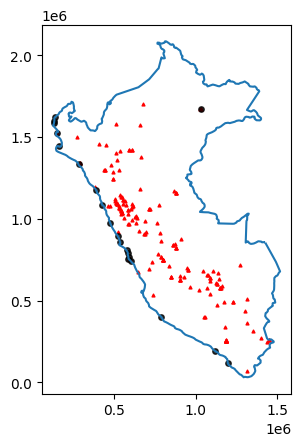

In [130]:
base = peru.boundary.plot()
hospital_24891.plot(ax=base,color='red',marker="^",markersize=4)
seaports_pe_24891.plot(ax=base,color = 'black',alpha=0.8,markersize=15)
plt.show()

### 2. Compute the distance matrix for both maps.

In [44]:
seaports_pe_24891.head()

,name,Country Code,Latitude,Longitude,geometry
0,La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (589113.575 768847.884)
1,Iquitos,Peru,-3.750000,-73.233333,POINT (1031485.913 1672619.329)
2,Chancay,Peru,-11.583333,-77.250000,POINT (576836.026 807768.749)
3,Puerto Supe,Peru,-10.800000,-77.750000,POINT (523049.750 895072.078)
4,Salaverry,Peru,-8.233333,-78.983333,POINT (389344.884 1179950.206)


In [45]:
hospital_24891.head()

,name,tipo,Latitude,Longitude,geometry
0,Clinica Angeles,hospital,-7.164819,-78.499376,POINT (443236.154 1297938.682)
1,Puesto de Salud Tunan,hospital,-10.566427,-77.759120,POINT (522280.907 920940.930)
2,E.E.S.S José Sabogal,hospital,-7.249858,-78.037710,POINT (494209.135 1288279.166)
3,Hospital Orurillo,hospital,-14.721034,-70.519466,POINT (1301668.655 438648.812)
4,Hospital - MINSA: Julio C. de Marini --- Puerta 4,hospital,-11.063388,-75.334201,POINT (787310.657 862398.526)


In [46]:
# Distancia entre Hospital Clinica Angeles y La pampilla oil terminal en km
hospital_24891.iloc[0].geometry.distance(seaports_pe_24891.iloc[0].geometry)/1000

548.8326654754006

In [47]:
DF_distance = seaports_pe_24891.geometry.apply\
(lambda g: hospital_24891.geometry.distance(g)/1000)
DF_distance

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,548.832665,166.129167,528.030027,785.344618,219.166160,649.574040,533.272390,11.759705,330.068993,367.870217,...,18.115392,209.331106,783.926409,651.071969,416.689917,420.389221,650.351296,522.318506,998.744176,306.075445
1,697.440583,907.915279,660.593444,1263.203053,846.214693,1191.850135,624.617462,1013.991516,812.298576,639.669705,...,1014.276875,950.690337,1423.713145,507.778441,1090.909225,613.602703,508.238507,993.985198,1473.359772,783.420481
2,508.050675,125.635200,487.562779,813.407566,217.448805,678.053401,493.309225,52.531291,289.298057,341.594572,...,58.127177,228.005272,818.920359,612.313301,445.939409,384.636329,611.590454,542.164425,1029.517023,265.582153
3,410.696616,25.880274,394.263357,902.535095,266.273145,768.275668,403.947184,154.189602,189.865474,315.283875,...,160.319773,310.080441,917.882565,529.232180,538.474248,319.520289,528.502812,619.075594,1122.451951,174.594137
4,129.713336,291.131914,150.770271,1175.526444,509.132425,1046.345560,184.980610,468.813039,133.389813,394.308393,...,474.798578,592.148482,1217.184609,313.481300,826.920920,272.434122,312.854990,871.467609,1403.028498,180.076557
5,577.747374,195.697874,556.271771,761.705338,219.429618,625.786602,560.813582,18.000268,359.414107,384.170223,...,12.150505,194.541303,756.233173,677.213157,392.765099,443.959327,676.495066,504.477315,973.355774,334.440448
6,964.565232,587.456720,938.332538,514.706437,465.069174,397.762047,937.701529,409.990963,749.806256,690.489294,...,403.856356,353.909379,418.470311,1041.496679,255.030783,795.758060,1040.811597,424.403118,673.802997,719.616951
7,326.867386,68.275945,315.767081,981.758858,328.446726,848.676265,330.286820,244.062212,106.293288,316.214397,...,250.245523,389.085256,1004.677712,461.059993,621.349023,279.025087,460.333020,690.620059,1204.276575,110.375937
8,212.661691,189.220506,212.694066,1086.170093,421.969382,955.196664,236.213643,366.643172,47.936287,343.410688,...,372.694568,497.679849,1120.134216,371.275326,732.233053,251.966783,370.576146,786.681338,1311.836147,103.537387
9,162.650038,477.323269,214.494129,1355.501250,689.804270,1228.102081,248.733875,654.461843,319.802620,546.970433,...,660.613938,777.134130,1403.062389,317.728139,1011.633830,406.432764,317.423889,1048.057543,1584.365671,362.457485


In [50]:
seaPortName = seaports_pe_24891.set_index('name')
seaPortName

,Country Code,Latitude,Longitude,geometry
name,,,,
La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (589113.575 768847.884)
Iquitos,Peru,-3.750000,-73.233333,POINT (1031485.913 1672619.329)
Chancay,Peru,-11.583333,-77.250000,POINT (576836.026 807768.749)
Puerto Supe,Peru,-10.800000,-77.750000,POINT (523049.750 895072.078)
Salaverry,Peru,-8.233333,-78.983333,POINT (389344.884 1179950.206)
Conchan Oil Terminal,Peru,-12.166667,-77.000000,POINT (603329.260 742815.069)
Bahia San Nicolas,Peru,-15.250000,-75.233333,POINT (788623.266 397331.204)
Punta Lobitos (Bahia De Huarmey),Peru,-10.100000,-78.166667,POINT (478020.130 972927.354)
Puerto De Chimbote,Peru,-9.083333,-78.616667,POINT (429289.610 1085734.797)


In [58]:
hospName = hospital_24891.set_index('Latitude')
hospName

,name,tipo,Longitude,geometry
Latitude,,,,
-7.164819,Clinica Angeles,hospital,-78.499376,POINT (443236.154 1297938.682)
-10.566427,Puesto de Salud Tunan,hospital,-77.759120,POINT (522280.907 920940.930)
-7.249858,E.E.S.S José Sabogal,hospital,-78.037710,POINT (494209.135 1288279.166)
-14.721034,Hospital Orurillo,hospital,-70.519466,POINT (1301668.655 438648.812)
-11.063388,Hospital - MINSA: Julio C. de Marini --- Puerta 4,hospital,-75.334201,POINT (787310.657 862398.526)
...,...,...,...,...
-8.189700,Hospital de Tocache,hospital,-76.513832,POINT (661762.904 1182912.096)
-6.062290,Hospital de apoyo de Rioja,hospital,-77.170810,POINT (590937.038 1419196.623)
-12.621540,Centro de Salud,hospital,-72.407222,POINT (1104040.248 681285.661)


In [59]:
seaPortName.geometry.apply(lambda g: hospName.geometry.distance(g)/1000)

Latitude,-7.164819,-10.566427,-7.249858,-14.721034,-11.063388,-14.314151,-7.151624,-12.030624,-9.139774,-9.036817,...,-12.060909,-12.063551,-16.387885,-6.055780,-13.532035,-8.189700,-6.062290,-12.621540,-16.247167,-9.224351
name,,,,,,,,,,,,,,,,,,,,,
La Pampilla Oil Terminal,548.832665,166.129167,528.030027,785.344618,219.166160,649.574040,533.272390,11.759705,330.068993,367.870217,...,18.115392,209.331106,783.926409,651.071969,416.689917,420.389221,650.351296,522.318506,998.744176,306.075445
Iquitos,697.440583,907.915279,660.593444,1263.203053,846.214693,1191.850135,624.617462,1013.991516,812.298576,639.669705,...,1014.276875,950.690337,1423.713145,507.778441,1090.909225,613.602703,508.238507,993.985198,1473.359772,783.420481
Chancay,508.050675,125.635200,487.562779,813.407566,217.448805,678.053401,493.309225,52.531291,289.298057,341.594572,...,58.127177,228.005272,818.920359,612.313301,445.939409,384.636329,611.590454,542.164425,1029.517023,265.582153
Puerto Supe,410.696616,25.880274,394.263357,902.535095,266.273145,768.275668,403.947184,154.189602,189.865474,315.283875,...,160.319773,310.080441,917.882565,529.232180,538.474248,319.520289,528.502812,619.075594,1122.451951,174.594137
Salaverry,129.713336,291.131914,150.770271,1175.526444,509.132425,1046.345560,184.980610,468.813039,133.389813,394.308393,...,474.798578,592.148482,1217.184609,313.481300,826.920920,272.434122,312.854990,871.467609,1403.028498,180.076557
Conchan Oil Terminal,577.747374,195.697874,556.271771,761.705338,219.429618,625.786602,560.813582,18.000268,359.414107,384.170223,...,12.150505,194.541303,756.233173,677.213157,392.765099,443.959327,676.495066,504.477315,973.355774,334.440448
Bahia San Nicolas,964.565232,587.456720,938.332538,514.706437,465.069174,397.762047,937.701529,409.990963,749.806256,690.489294,...,403.856356,353.909379,418.470311,1041.496679,255.030783,795.758060,1040.811597,424.403118,673.802997,719.616951
Punta Lobitos (Bahia De Huarmey),326.867386,68.275945,315.767081,981.758858,328.446726,848.676265,330.286820,244.062212,106.293288,316.214397,...,250.245523,389.085256,1004.677712,461.059993,621.349023,279.025087,460.333020,690.620059,1204.276575,110.375937
Puerto De Chimbote,212.661691,189.220506,212.694066,1086.170093,421.969382,955.196664,236.213643,366.643172,47.936287,343.410688,...,372.694568,497.679849,1120.134216,371.275326,732.233053,251.966783,370.576146,786.681338,1311.836147,103.537387


In [71]:
MatrizDistance = seaPortName.geometry.apply(lambda g: hospName.geometry.distance(g)/1000)#.\
#sort_index(axis=0).sort_index(axis=1)
MatrizDistance.head()

Latitude,-7.164819,-10.566427,-7.249858,-14.721034,-11.063388,-14.314151,-7.151624,-12.030624,-9.139774,-9.036817,...,-12.060909,-12.063551,-16.387885,-6.055780,-13.532035,-8.189700,-6.062290,-12.621540,-16.247167,-9.224351
name,,,,,,,,,,,,,,,,,,,,,
La Pampilla Oil Terminal,548.832665,166.129167,528.030027,785.344618,219.166160,649.574040,533.272390,11.759705,330.068993,367.870217,...,18.115392,209.331106,783.926409,651.071969,416.689917,420.389221,650.351296,522.318506,998.744176,306.075445
Iquitos,697.440583,907.915279,660.593444,1263.203053,846.214693,1191.850135,624.617462,1013.991516,812.298576,639.669705,...,1014.276875,950.690337,1423.713145,507.778441,1090.909225,613.602703,508.238507,993.985198,1473.359772,783.420481
Chancay,508.050675,125.635200,487.562779,813.407566,217.448805,678.053401,493.309225,52.531291,289.298057,341.594572,...,58.127177,228.005272,818.920359,612.313301,445.939409,384.636329,611.590454,542.164425,1029.517023,265.582153
Puerto Supe,410.696616,25.880274,394.263357,902.535095,266.273145,768.275668,403.947184,154.189602,189.865474,315.283875,...,160.319773,310.080441,917.882565,529.232180,538.474248,319.520289,528.502812,619.075594,1122.451951,174.594137
Salaverry,129.713336,291.131914,150.770271,1175.526444,509.132425,1046.345560,184.980610,468.813039,133.389813,394.308393,...,474.798578,592.148482,1217.184609,313.481300,826.920920,272.434122,312.854990,871.467609,1403.028498,180.076557


### 3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.

In [63]:
MatrizDistance.mean(axis=1).sort_values(ascending=True)

name
Chancay                              448.143117
Bahia De Ancon                       449.625592
La Pampilla Oil Terminal             452.819991
Conchan Oil Terminal                 455.602180
Puerto De Huacho                     455.714610
Puerto Supe                          457.084584
Puerto Del Callao                    457.596527
Punta Lobitos (Bahia De Huarmey)     476.164537
Puerto De Chimbote                   520.391670
Salaverry                            579.275404
Bahia San Nicolas                    605.486088
Pimental                             727.716116
Bahia De Matarani                    786.740363
Puerto Ilo                           874.688745
Puerto Bayovar                       882.304410
Iquitos                              909.292370
Paita                                940.145080
Talara                               990.956609
Caleta Lobitos                      1001.373271
Puerto Cabo Blanco                  1013.599111
dtype: float64

In [84]:
RawMD = MatrizDistance.loc[['Puerto Supe']]
RawMD

Latitude,-7.164819,-10.566427,-7.249858,-14.721034,-11.063388,-14.314151,-7.151624,-12.030624,-9.139774,-9.036817,...,-12.060909,-12.063551,-16.387885,-6.055780,-13.532035,-8.189700,-6.062290,-12.621540,-16.247167,-9.224351
name,,,,,,,,,,,,,,,,,,,,,
Puerto Supe,410.696616,25.880274,394.263357,902.535095,266.273145,768.275668,403.947184,154.189602,189.865474,315.283875,...,160.319773,310.080441,917.882565,529.23218,538.474248,319.520289,528.502812,619.075594,1122.451951,174.594137


In [89]:
SomeStats=pd.DataFrame()
SomeStats['min']=RawMD.min(axis=1)
SomeStats['max']=RawMD.max(axis=1)

# see some
SomeStats

,min,max
name,,
Puerto Supe,25.880274,1143.444191


In [92]:
Dmin = SomeStats.iloc[0,0]
Dmin

25.880274006481745

In [95]:
RawMD.columns[RawMD.eq(Dmin).any()]

Index([-10.5664266712342], dtype='float64', name='Latitude')

In [101]:
hospmin = (RawMD == Dmin).idxmax(axis=1)[0]
hospmin

-10.5664266712342

In [109]:
pointHosp = hospName.loc[[hospmin]].reset_index()
pointHosp

,Latitude,name,tipo,Longitude,geometry
0,-10.566427,Puesto de Salud Tunan,hospital,-77.75912,POINT (522280.907 920940.930)


In [110]:
pointSea = seaports_pe_24891[seaports_pe_24891['name'].str.contains('Puerto Supe', case=False)]
pointSea

,name,Country Code,Latitude,Longitude,geometry
3,Puerto Supe,Peru,-10.8,-77.75,POINT (523049.750 895072.078)


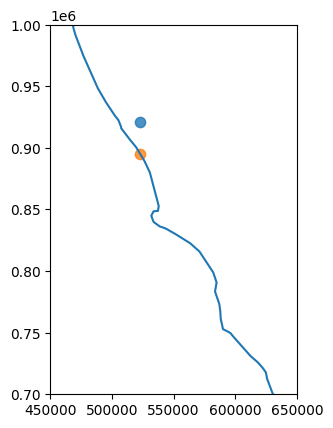

In [126]:
# Eligiré Puerto Supe,la distancia minima es 25.880274
base=peru.boundary.plot()
pointHosp.plot(ax=base,alpha=0.8,markersize=55)
pointSea.plot(ax=base,alpha=0.8,markersize=55)

base.set_xlim([0.45*10**6,0.65*10**6])  
base.set_ylim([0.7*10**6,1*10**6]) 
plt.show()

In [178]:
base=peru.boundary.explore()
pointHosp.explore(m=base,color='green',marker_kwds=dict(radius=5))
pointSea.explore(m=base,color='blue',marker_kwds=dict(radius=5))

## Exercise 2

    
### 1. Use a map of points and a map of lines.

In [135]:
rivers

,NAME,SYSTEM,geometry
0,Purus,Amazon,"LINESTRING (1131054.221 886360.832, 1176563.29..."
1,Amazon,Amazon,"MULTILINESTRING ((1354163.098 1665135.135, 135..."
2,Putamayo,Amazon,"MULTILINESTRING ((802419.846 2076530.727, 8388..."
3,Ucayali,Amazon,"LINESTRING (1172614.703 369928.966, 1206823.39..."
4,Rio Maranon,Amazon,"LINESTRING (661246.427 945690.747, 659626.587 ..."


In [138]:
rivers[rivers.NAME.str.contains('Amazon')]

,NAME,SYSTEM,geometry
1,Amazon,Amazon,"MULTILINESTRING ((1354163.098 1665135.135, 135..."


### 2. Compute the distance matrix for both maps.

In [142]:
#Distancia del rio Amazonas a cada puerto maritimo
rivers[rivers.NAME.str.contains('Amazon')].iloc[0].geometry.distance(seaPortName.geometry)/1000

name
La Pampilla Oil Terminal             938.685854
Iquitos                               25.999630
Chancay                              910.333608
Puerto Supe                          865.348486
Salaverry                            761.349308
Conchan Oil Terminal                 955.494755
Bahia San Nicolas                   1226.257348
Punta Lobitos (Bahia De Huarmey)     831.937014
Puerto De Chimbote                   786.604283
Pimental                             785.261583
Bahia De Matarani                   1412.619401
Bahia De Ancon                       923.148166
Caleta Lobitos                       888.469431
Puerto Ilo                          1493.779814
Puerto Cabo Blanco                   883.161887
Puerto De Huacho                     886.381690
Puerto Del Callao                    951.045501
Talara                               888.613747
Puerto Bayovar                       876.296463
Paita                                872.906597
Name: geometry, dtype: float64

In [143]:
MatrizDistanceRiver=rivers.set_index('NAME').geometry.apply\
(lambda g: seaPortName.geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
MatrizDistanceRiver

name,Bahia De Ancon,Bahia De Matarani,Bahia San Nicolas,Caleta Lobitos,Chancay,Conchan Oil Terminal,Iquitos,La Pampilla Oil Terminal,Paita,Pimental,Puerto Bayovar,Puerto Cabo Blanco,Puerto De Chimbote,Puerto De Huacho,Puerto Del Callao,Puerto Ilo,Puerto Supe,Punta Lobitos (Bahia De Huarmey),Salaverry,Talara
NAME,,,,,,,,,,,,,,,,,,,,
Amazon,923.148166,1412.619401,1226.257348,888.469431,910.333608,955.494755,25.999630,938.685854,872.906597,785.261583,876.296463,883.161887,786.604283,886.381690,951.045501,1493.779814,865.348486,831.937014,761.349308,888.613747
Purus,555.709161,691.852305,596.999947,1224.213424,559.762917,546.899461,726.298010,554.534901,1169.300835,957.774488,1119.420187,1232.768357,729.536529,594.334959,559.332320,763.999198,608.066874,658.746755,797.701361,1215.682765
Putamayo,1146.814623,1619.645834,1451.011736,820.666285,1133.409318,1180.427332,156.870694,1162.853518,849.061777,904.250018,899.463133,803.425271,987.084802,1106.522808,1175.347781,1693.782465,1083.624801,1044.001778,947.120669,829.327022
Rio Maranon,174.541279,881.607516,562.959188,335.726038,161.702174,210.980897,72.202547,190.988341,293.570363,191.834800,275.920587,341.164953,173.915096,150.747760,203.703765,985.681183,147.175307,182.885655,171.609286,329.527196
Ucayali,347.376265,186.921893,319.062679,722.557738,351.923915,339.159054,72.202547,346.120585,689.196274,535.528437,672.352845,723.366590,445.476261,389.798011,351.086943,254.030877,406.889982,446.376363,446.679764,718.827705


In [149]:
AmazonDistance = MatrizDistanceRiver.loc[['Amazon']]
AmazonDistance

name,Bahia De Ancon,Bahia De Matarani,Bahia San Nicolas,Caleta Lobitos,Chancay,Conchan Oil Terminal,Iquitos,La Pampilla Oil Terminal,Paita,Pimental,Puerto Bayovar,Puerto Cabo Blanco,Puerto De Chimbote,Puerto De Huacho,Puerto Del Callao,Puerto Ilo,Puerto Supe,Punta Lobitos (Bahia De Huarmey),Salaverry,Talara
NAME,,,,,,,,,,,,,,,,,,,,
Amazon,923.148166,1412.619401,1226.257348,888.469431,910.333608,955.494755,25.99963,938.685854,872.906597,785.261583,876.296463,883.161887,786.604283,886.38169,951.045501,1493.779814,865.348486,831.937014,761.349308,888.613747


In [151]:
AmazonD=pd.DataFrame()
AmazonD['min']=AmazonDistance.min(axis=1)
AmazonD['max']=AmazonDistance.max(axis=1)

# see some
AmazonD

,min,max
NAME,,
Amazon,25.99963,1493.779814


### 3. Select one line of the distance matrix, and plot the closests and the farthest point to that line.

In [152]:
dmin = AmazonD.iloc[0,0]
dmax = AmazonD.iloc[0,1]

In [155]:
rivMin = (AmazonDistance == dmin).idxmax(axis=1)[0]


In [156]:
rivMax = (AmazonDistance == dmax).idxmax(axis=1)[0]

In [167]:
pointRivMin  = seaPortName.loc[[rivMin]]
pointRivMin 

,Country Code,Latitude,Longitude,geometry
name,,,,
Iquitos,Peru,-3.75,-73.233333,POINT (1031485.913 1672619.329)


In [168]:
pointRivMax  = seaPortName.loc[[rivMax]]
pointRivMax

,Country Code,Latitude,Longitude,geometry
name,,,,
Puerto Ilo,Peru,-17.633333,-71.366667,POINT (1194737.080 116863.191)


In [179]:
base=rivers[rivers.NAME.str.contains('Amazon')].explore()
#el puerto mas cercano al Amazonas
pointRivMax.explore(m=base,color='red',marker_kwds=dict(radius=10))
# el puerto mas lejano al Amazonas
pointRivMin.explore(m=base,color='red',marker_kwds=dict(radius=10))

## Exercise 3

In [180]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry
0,Purus,Amazon,"LINESTRING (1131054.221 886360.832, 1176563.29..."
1,Amazon,Amazon,"MULTILINESTRING ((1354163.098 1665135.135, 135..."
2,Putamayo,Amazon,"MULTILINESTRING ((802419.846 2076530.727, 8388..."
3,Ucayali,Amazon,"LINESTRING (1172614.703 369928.966, 1206823.39..."
4,Rio Maranon,Amazon,"LINESTRING (661246.427 945690.747, 659626.587 ..."


In [183]:
system=rivers.dissolve(by='SYSTEM')
system

,geometry,NAME
SYSTEM,,
Amazon,"MULTILINESTRING ((1131054.221 886360.832, 1176...",Purus


In [184]:
system.reset_index(drop=False,inplace=True)
system.drop(columns='NAME',inplace=True)

system

,SYSTEM,geometry
0,Amazon,"MULTILINESTRING ((1131054.221 886360.832, 1176..."


In [186]:
SystemMatrix = system.set_index('SYSTEM').geometry.apply\
(lambda g: seaPortName.geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

SystemMatrix

name,Bahia De Ancon,Bahia De Matarani,Bahia San Nicolas,Caleta Lobitos,Chancay,Conchan Oil Terminal,Iquitos,La Pampilla Oil Terminal,Paita,Pimental,Puerto Bayovar,Puerto Cabo Blanco,Puerto De Chimbote,Puerto De Huacho,Puerto Del Callao,Puerto Ilo,Puerto Supe,Punta Lobitos (Bahia De Huarmey),Salaverry,Talara
SYSTEM,,,,,,,,,,,,,,,,,,,,
Amazon,174.541279,186.921893,319.062679,335.726038,161.702174,210.980897,25.99963,190.988341,293.570363,191.8348,275.920587,341.164953,173.915096,150.74776,203.703765,254.030877,147.175307,182.885655,171.609286,329.527196


In [194]:
PortSystem = seaports_pe_24891.dissolve()
PortSystem

,geometry,name,Country Code,Latitude,Longitude
0,"MULTIPOINT (135318.377 1598546.647, 135334.239...",La Pampilla Oil Terminal,Peru,-11.933333,-77.133333


   
### 1. Create a set of points and a set of polygons

In [187]:
system.convex_hull

0    POLYGON ((1172614.703 369928.966, 661246.427 9...
dtype: geometry

<Axes: >

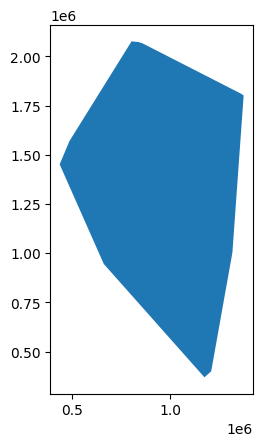

In [188]:
system.convex_hull.plot()

In [195]:
PortSystem.convex_hull

0    POLYGON ((1194737.080 116863.191, 788623.266 3...
dtype: geometry

<Axes: >

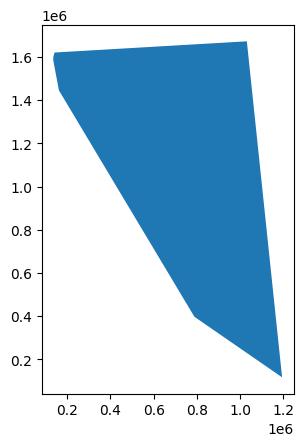

In [196]:
PortSystem.convex_hull.plot()

### 2. Compute the distance matrix for both sets.

In [199]:
systems_hulls=system.convex_hull.to_frame()
systems_hulls['system']=['Amazon']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:24891"
systems_hulls

,geometry,system
0,"POLYGON ((1172614.703 369928.966, 661246.427 9...",Amazon


In [200]:
DistancePol =systems_hulls.set_index('system').geometry.apply\
(lambda g: seaPortName.geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

DistancePol

name,Bahia De Ancon,Bahia De Matarani,Bahia San Nicolas,Caleta Lobitos,Chancay,Conchan Oil Terminal,Iquitos,La Pampilla Oil Terminal,Paita,Pimental,Puerto Bayovar,Puerto Cabo Blanco,Puerto De Chimbote,Puerto De Huacho,Puerto Del Callao,Puerto Ilo,Puerto Supe,Punta Lobitos (Bahia De Huarmey),Salaverry,Talara
system,,,,,,,,,,,,,,,,,,,,
Amazon,161.733929,186.921893,268.906036,335.213423,154.700335,178.024956,0.0,171.366412,293.570363,186.495242,275.920587,338.682657,155.388624,150.74776,181.41114,254.030877,146.857156,156.506963,153.764797,329.489885


### 3. Select one polygon of the distance matrix, and plot the closests and the farthest point to that polygon.

In [201]:
mins=DistancePol.idxmin(axis="columns")
mins

system
Amazon    Iquitos
dtype: object

In [202]:
maxs=DistancePol.idxmax(axis="columns")
maxs

system
Amazon    Puerto Cabo Blanco
dtype: object

In [207]:
base=systems_hulls.explore(color='yellow')
rivers.explore(m=base)
seaports_pe_24891[seaports_pe_24891.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
seaports_pe_24891[seaports_pe_24891.name.isin(maxs)].explore(m=base,color='blue',marker_kwds=dict(radius=10))

## Exercise 4

 
### 1. Create a set of points and a set of lines

In [239]:
MatrizRiverHosp=rivers.set_index('NAME').geometry.apply\
(lambda g: hospName.geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
MatrizRiverHosp

Latitude,-18.017590,-16.435019,-16.432789,-16.427053,-16.414922,-16.405231,-16.401872,-16.400836,-16.395251,-16.395170,...,-5.754284,-5.713447,-5.316950,-5.083226,-4.650864,-4.600688,-3.774880,-3.750730,-3.745417,-3.475285
NAME,,,,,,,,,,,,,,,,,,,,,
Amazon,1560.135049,1358.458726,1358.313858,1358.162054,1356.341802,1355.259696,1355.234525,1355.103074,1354.165240,1354.283360,...,591.939828,629.594560,758.332705,873.025216,368.156442,509.531152,32.031674,28.070593,26.913785,364.567238
Purus,824.298307,628.975497,628.760817,628.291028,626.764729,625.677748,625.424161,625.302246,624.565276,624.600240,...,886.307128,920.183217,1057.437516,1169.407561,836.445311,929.000133,725.987557,727.062631,727.185928,937.656180
Putamayo,1735.115736,1558.800166,1558.585263,1558.109287,1556.589092,1555.502121,1555.244730,1555.123084,1554.389562,1554.423562,...,715.213495,731.740203,781.529593,849.145876,480.623080,572.710184,161.585903,157.751673,156.799257,392.571622
Rio Maranon,1093.063962,868.084336,868.291376,869.682771,866.754491,865.872554,866.940396,866.784611,865.042842,865.536194,...,9.679506,27.633293,173.081491,293.689248,14.688167,0.325360,69.096702,71.944730,72.615585,136.933000
Ucayali,333.005225,118.660214,118.496015,118.298231,116.516087,115.431774,115.372998,115.242169,114.332314,114.435367,...,384.947355,425.107659,568.585182,689.316500,241.799511,361.531300,69.096702,71.944730,72.615585,332.485142


In [240]:
MatrizRiverHosp

Latitude,-18.017590,-16.435019,-16.432789,-16.427053,-16.414922,-16.405231,-16.401872,-16.400836,-16.395251,-16.395170,...,-5.754284,-5.713447,-5.316950,-5.083226,-4.650864,-4.600688,-3.774880,-3.750730,-3.745417,-3.475285
NAME,,,,,,,,,,,,,,,,,,,,,
Amazon,1560.135049,1358.458726,1358.313858,1358.162054,1356.341802,1355.259696,1355.234525,1355.103074,1354.165240,1354.283360,...,591.939828,629.594560,758.332705,873.025216,368.156442,509.531152,32.031674,28.070593,26.913785,364.567238
Purus,824.298307,628.975497,628.760817,628.291028,626.764729,625.677748,625.424161,625.302246,624.565276,624.600240,...,886.307128,920.183217,1057.437516,1169.407561,836.445311,929.000133,725.987557,727.062631,727.185928,937.656180
Putamayo,1735.115736,1558.800166,1558.585263,1558.109287,1556.589092,1555.502121,1555.244730,1555.123084,1554.389562,1554.423562,...,715.213495,731.740203,781.529593,849.145876,480.623080,572.710184,161.585903,157.751673,156.799257,392.571622
Rio Maranon,1093.063962,868.084336,868.291376,869.682771,866.754491,865.872554,866.940396,866.784611,865.042842,865.536194,...,9.679506,27.633293,173.081491,293.689248,14.688167,0.325360,69.096702,71.944730,72.615585,136.933000
Ucayali,333.005225,118.660214,118.496015,118.298231,116.516087,115.431774,115.372998,115.242169,114.332314,114.435367,...,384.947355,425.107659,568.585182,689.316500,241.799511,361.531300,69.096702,71.944730,72.615585,332.485142


In [242]:
minMts1=MatrizRiverHosp.loc['Ucayali'].min()*1000

In [243]:
minMts2=MatrizRiverHosp.loc['Amazon'].min()*1000

### 2. Get the buffer for the lines, select different values for the distance.

In [337]:
bufferAroundAmazon=rivers[rivers.NAME=='Amazon'].buffer(distance = minMts2)
bufferAsBaseAmazon=bufferAroundAmazon.explore(color='skyblue')
rivers[rivers.NAME=='Amazon'].explore(m=bufferAsBaseAmazon,color='blue',style_kwds={'weight':0.5})
hospital_24891.explore(m=bufferAsBaseAmazon,color='black')

In [315]:
clinic = healthsites[healthsites.tipo=="clinic"]
clinic = clinic.dropna()
clinic.reset_index(drop=True, inplace=True)
clinic.head()

,name,tipo,Latitude,Longitude,geometry
0,C.S. Humay,clinic,-13.723504,-75.890124,POINT (721265.335 568293.953)
1,Bellavista,clinic,-8.392582,-74.536877,POINT (880039.288 1157649.393)
2,Psicóloga,clinic,-12.140289,-76.962673,POINT (607436.252 745685.071)
3,House Bienestor y Salud,clinic,-11.930253,-76.690799,POINT (637403.079 768563.384)
4,Buenos Aires,clinic,-11.915073,-76.673163,POINT (639351.074 770219.269)


In [338]:
bufferAroundUcayali=rivers[rivers.NAME=='Ucayali'].buffer(distance = minMts1*2)
bufferAsBaseUcayali=bufferAroundUcayali.explore(color='red')
rivers[rivers.NAME=='Ucayali'].explore(m=bufferAsBaseUcayali,color='blue',style_kwds={'weight':0.5})
clinic.explore(m=bufferAsBaseUcayali,color='black')

### 3. Keep the points that are within the buffer (as in point 2, you need to play with differn distances until you show something interesting.  

In [285]:
healthsites.head()

,name,tipo,Latitude,Longitude,geometry
0,Clinica Angeles,hospital,-7.164819,-78.499376,POINT (443236.154 1297938.682)
1,Puesto de Salud Tunan,hospital,-10.566427,-77.759120,POINT (522280.907 920940.930)
2,E.E.S.S José Sabogal,hospital,-7.249858,-78.037710,POINT (494209.135 1288279.166)
3,Hospital Orurillo,hospital,-14.721034,-70.519466,POINT (1301668.655 438648.812)
4,Hospital - MINSA: Julio C. de Marini --- Puerta 4,hospital,-11.063388,-75.334201,POINT (787310.657 862398.526)


In [331]:
riversWithinBufferUcayali=clinic.clip(mask=bufferAroundUcayali)
riversWithinBufferUcayali.head()

,name,tipo,Latitude,Longitude,geometry
805,Espinar - Essalud,clinic,-14.792545,-71.412932,POINT (1203962.071 434805.652)
1032,Yauri,clinic,-14.790478,-71.404141,POINT (1204928.248 434997.733)
56,El Descanso,clinic,-14.533539,-71.306776,POINT (1216703.848 463310.984)
620,Techo Obrero,clinic,-14.288580,-71.224611,POINT (1226774.571 490360.500)
1175,Pampaphalla,clinic,-14.253414,-71.222321,POINT (1227182.993 494286.131)


In [340]:
bufferAsBaseUcayali=bufferAroundUcayali.explore(color='red')
rivers[rivers.NAME=='Ucayali'].explore(m=bufferAsBaseUcayali,color='blue',style_kwds={'weight':0.5})
riversWithinBufferUcayali.explore(m=bufferAsBaseUcayali,color='black')

In [333]:
riversWithinBufferAmazon=clinic.clip(mask=bufferAroundAmazon)
riversWithinBufferAmazon.head()

,name,tipo,Latitude,Longitude,geometry
1467,Yanashi,clinic,-3.587722,-72.255566,POINT (1141251.383 1689772.555)
549,Centro de salud Pevas,clinic,-3.319647,-71.860558,POINT (1185885.117 1719339.312)
637,Los Delfines,clinic,-3.846864,-73.341711,POINT (1019263.413 1661926.299)
692,America de San Juan Bautista,clinic,-3.787521,-73.299360,POINT (1024059.244 1668499.400)
1232,Cardozo,clinic,-3.774710,-73.273802,POINT (1026932.265 1669903.178)


In [341]:
bufferAsBaseAmazon=bufferAroundAmazon.explore(color='red')
rivers[rivers.NAME=='Amazon'].explore(m=bufferAsBaseAmazon,color='blue',style_kwds={'weight':0.5})
riversWithinBufferAmazon.explore(m=bufferAsBaseAmazon,color='black')

In [346]:
riversAll_buf=rivers.buffer(distance = minMts1*3)
allRiversWithinBuffs=clinic.clip(riversAll_buf)

base=riversAll_buf.explore(color='green')
allRiversWithinBuffs.explore(m=base, color='blue')